# Pymaceuticals Inc.
---

### Analysis

1. Capomulin and Ramicane Show Lower Tumor Volumes:
    a. Mean Tumor Volume: Capomulin and Ramicane have the lowest mean tumor volumes (40.68 and 40.22 mm³, respectively), suggesting these treatments are more effective in reducing tumor size compared to other regimens.
    b. Median Tumor Volume: The median tumor volumes for Capomulin and Ramicane (41.56 and 40.67 mm³) are also among the lowest, reinforcing their effectiveness in controlling tumor growth.
2. The number of male mice is slightly higher than the female ones in the study with 50.4 % and 49.6 %.
3. The correlation coefficient of 0.84 indicates a strong positive correlation between mouse weight and average tumor volume for the        Capomulin regimen. This means that as the weight of the mice increases, their average tumor volume tends to increase as well.
4. The linear regression line, which fits the data points, visually demonstrates the relationship between mouse weight and average tumor volume. The positive slope of the regression line supports the strong positive correlation observed.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
mice_total=len(combined_data["Mouse ID"].unique())
mice_total


249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates=combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_df=combined_data.loc[combined_data["Mouse ID"]=="g989"]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df=combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_df=len(clean_study_df["Mouse ID"].unique())
number_of_mice_df

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev=clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary=pd.DataFrame({"Mean Tumor Volume":mean,
                      "Median Tumor Volume":median,
                      "Tumor Volume Variance":variance,
                      "Tumor Volume Std. Dev.":standard_dev,
                      "Tumor Volume Std. Err.":sem
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Assuming clean_study_df is your DataFrame
summary_agg = clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_agg.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_agg.columns])

summary_agg
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

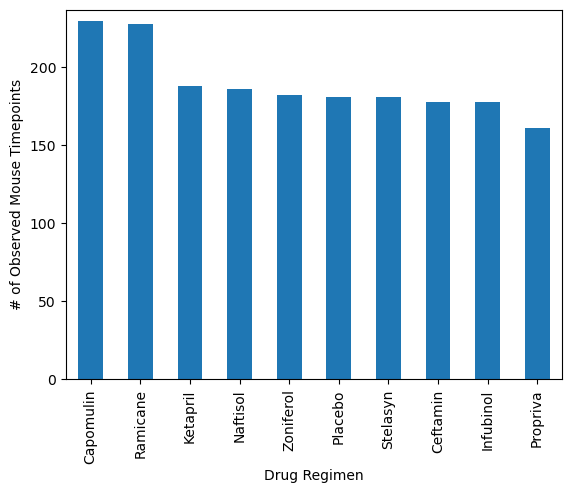

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = combined_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
bar_chart=mouse_counts.plot(kind='bar')
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('# of Observed Mouse Timepoints')
bar_chart.set_ylim(0, mouse_counts.max()+7)
plt.show()


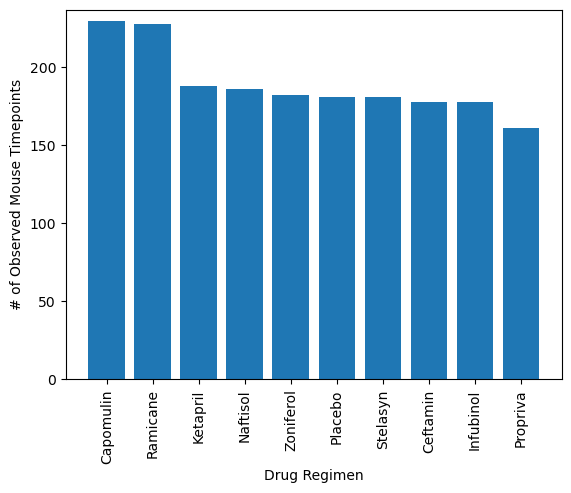

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_counts = combined_data.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
x_axis=mouse_counts.index
plt.bar(x_axis,mouse_counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.ylim(0, mouse_counts.max()+7)
plt.xticks(rotation=90) 
plt.show()


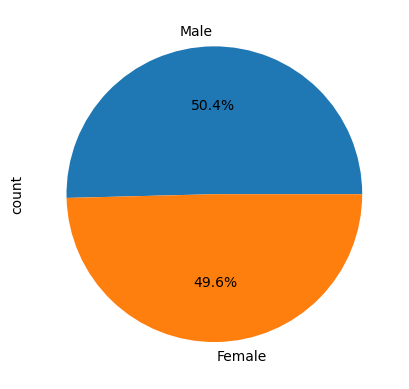

In [16]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_study_df.drop_duplicates(subset="Mouse ID")

# Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
pie_chart=gender_counts.plot(kind="pie",autopct="%1.1f%%")
plt.show()



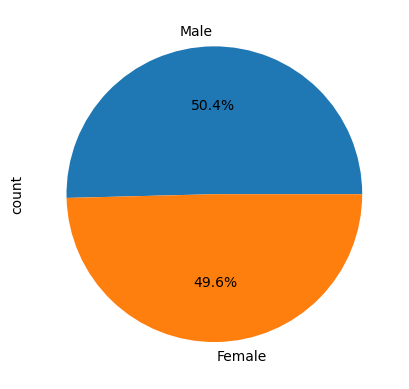

In [17]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice=clean_study_df.drop_duplicates(subset="Mouse ID")

# Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%")
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df=clean_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint_df=last_timepoint_df.rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(clean_study_df,last_timepoint_df,on="Mouse ID")
final_tumor_vol_df=merged_df[merged_df["Last Timepoint"] == merged_df["Timepoint"]]

# Filter the DataFrame to include only the specified treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol_df = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'].isin(treatments)]

final_tumor_vol_df.sort_values(by="Last Timepoint", ascending=False).head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
1768,c139,45,72.226731,2,Infubinol,Male,11,28,45
1823,a444,45,43.047543,0,Ramicane,Female,10,25,45
1816,b742,45,38.939633,0,Capomulin,Male,7,21,45
1815,j989,45,36.134852,1,Ramicane,Male,8,19,45
1809,c758,45,33.397653,1,Ramicane,Male,9,17,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data[treatment] = tumor_volumes

    # Determine outliers using upper and lower bounds
    #Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{treatment} treatment:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    
    # Identify any potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential Outliers: {outliers}\n")


Capomulin treatment:
Lower quartile: 32.37735684
Upper quartile: 40.1592203
IQR: 7.781863460000004
Lower bound: 20.70456164999999
Upper bound: 51.83201549
Capomulin's potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane treatment:
Lower quartile: 31.56046955
Upper quartile: 40.65900627
IQR: 9.098536719999998
Lower bound: 17.912664470000003
Upper bound: 54.30681135
Ramicane's potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol treatment:
Lower quartile: 54.04860769
Upper quartile: 65.52574285
IQR: 11.477135160000003
Lower bound: 36.83290494999999
Upper bound: 82.74144559000001
Infubinol's potential Outliers: 416    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin treatment:
Lower quartile: 48.72207785
Upper quartile: 64.29983003
IQR: 15.577752179999997
Lower bound: 25.355449580000002
Upper bound: 87.66645829999999
Ceftamin's potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



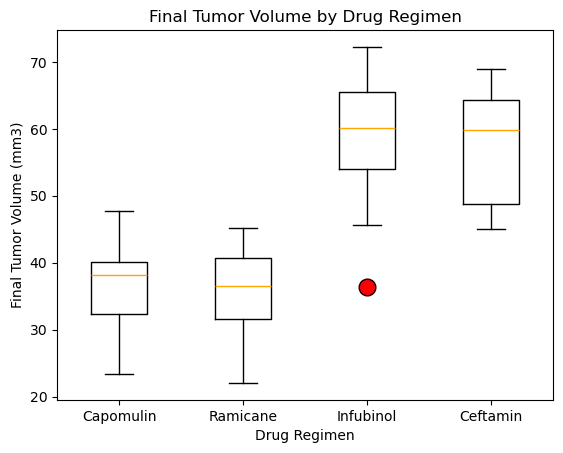

In [112]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol_df = pd.DataFrame(tumor_vol_data)
regimen=treatments
# use the dictionaries set the color of the box, whiskers, and caps and fliers.
boxprops = dict(color="black")
whiskerprops = dict(color="black")
capprops = dict(color="black")
medianprops = dict(color="orange")
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')

tumor_vol_df.boxplot(regimen, grid=False,
                     boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
                     medianprops=medianprops, flierprops=flierprops)

plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel('Drug Regimen')
plt.title('Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

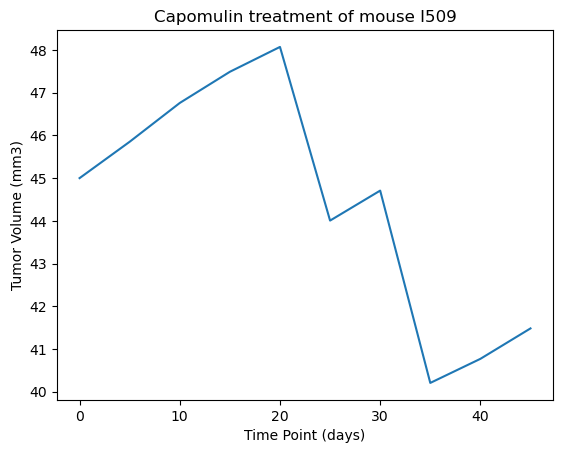

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Filter the DataFrame for the Capomulin regimen and the specific Mouse ID 'l509'
capomulin_data = clean_study_df[(clean_study_df['Drug Regimen'] == 'Capomulin') & 
                                (clean_study_df['Mouse ID'] == 'l509')]

# Plot the data
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()




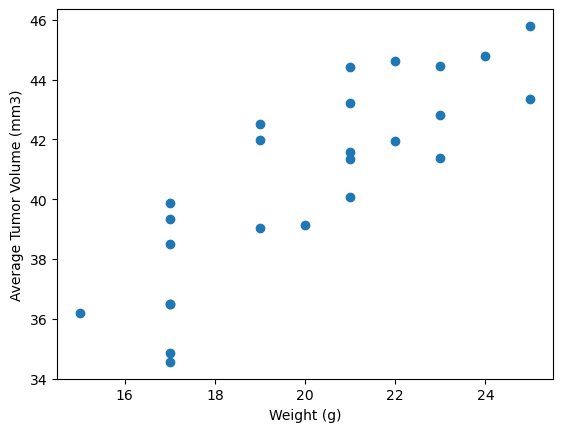

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original DataFrame to get the mouse weight
mouse_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_vol, mouse_data, on='Mouse ID')

# Generate the scatter plot

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume is 0.84


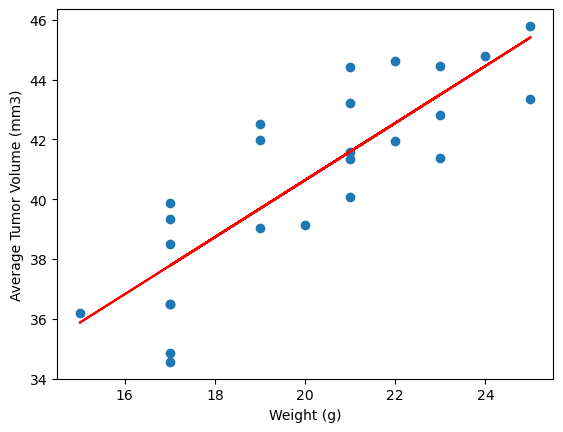

In [23]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the original DataFrame to get the mouse weight
mouse_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_vol, mouse_data, on='Mouse ID')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average tumor volume is {round(correlation_coefficient,2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the data along with the linear regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red', label='Fitted Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.show()